## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              3185.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:24:41   Log-Likelihood:                         -15748.
No. Observations:               16512   AIC:                                  3.151e+04
Df Residuals:                   16504   BIC:                                  3.157e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

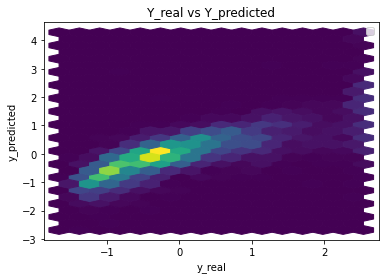

Performance Metrics
Mean Squared Error: 0.3925213256037132
Mean Absolute Error: 0.4607122343752407
Manhattan distance: 1901.8201035009993
Euclidean distance: 40.25329840015756


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.3826601588279655


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9614490	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.9297362	total: 64ms	remaining: 32s
2:	learn: 0.8997721	total: 67.4ms	remaining: 22.4s
3:	learn: 0.8723303	total: 70.1ms	remaining: 17.4s
4:	learn: 0.8477201	total: 73.1ms	remaining: 14.6s
5:	learn: 0.8239043	total: 75.7ms	remaining: 12.5s
6:	learn: 0.8017203	total: 78.1ms	remaining: 11.1s
7:	learn: 0.7812133	total: 80.4ms	remaining: 9.97s
8:	learn: 0.7625671	total: 83.1ms	remaining: 9.15s
9:	learn: 0.7456676	total: 85.6ms	remaining: 8.47s
10:	learn: 0.7296063	total: 88.4ms	remaining: 7.95s
11:	learn: 0.7145642	total: 90.8ms	remaining: 7.47s
12:	learn: 0.7010049	total: 93.3ms	remaining: 7.08s
13:	learn: 0.6862400	total: 96ms	remaining: 6.76s
14:	learn: 0.6751091	total: 98.1ms	remaining: 6.44s
15:	learn: 0.6646666	total: 101ms	remaining: 6.2s
16:	learn: 0.6532216	total: 103ms	remaining: 5.96s
17:	learn: 0.6433342	total: 106ms	remaining: 5.75s
18:	learn: 0.6348366	total: 108ms	remaining: 5.56s
19:

26:	learn: 0.5749347	total: 127ms	remaining: 4.58s
27:	learn: 0.5707773	total: 130ms	remaining: 4.5s
28:	learn: 0.5659568	total: 132ms	remaining: 4.42s
29:	learn: 0.5618459	total: 135ms	remaining: 4.35s
30:	learn: 0.5584066	total: 137ms	remaining: 4.29s
31:	learn: 0.5541948	total: 139ms	remaining: 4.22s
32:	learn: 0.5499826	total: 142ms	remaining: 4.16s
33:	learn: 0.5472371	total: 145ms	remaining: 4.12s
34:	learn: 0.5426693	total: 148ms	remaining: 4.07s
35:	learn: 0.5395608	total: 150ms	remaining: 4.01s
36:	learn: 0.5367267	total: 152ms	remaining: 3.96s
37:	learn: 0.5331029	total: 155ms	remaining: 3.91s
38:	learn: 0.5293659	total: 157ms	remaining: 3.88s
39:	learn: 0.5263348	total: 160ms	remaining: 3.84s
40:	learn: 0.5239965	total: 162ms	remaining: 3.79s
41:	learn: 0.5220334	total: 165ms	remaining: 3.77s
42:	learn: 0.5191094	total: 168ms	remaining: 3.73s
43:	learn: 0.5156307	total: 170ms	remaining: 3.69s
44:	learn: 0.5138433	total: 173ms	remaining: 3.67s
45:	learn: 0.5117849	total: 175m

53:	learn: 0.4968731	total: 195ms	remaining: 3.41s
54:	learn: 0.4943418	total: 197ms	remaining: 3.39s
55:	learn: 0.4931313	total: 200ms	remaining: 3.37s
56:	learn: 0.4913957	total: 203ms	remaining: 3.36s
57:	learn: 0.4905393	total: 206ms	remaining: 3.34s
58:	learn: 0.4895519	total: 208ms	remaining: 3.32s
59:	learn: 0.4880627	total: 210ms	remaining: 3.29s
60:	learn: 0.4868808	total: 213ms	remaining: 3.27s
61:	learn: 0.4856112	total: 215ms	remaining: 3.26s
62:	learn: 0.4847759	total: 218ms	remaining: 3.24s
63:	learn: 0.4835661	total: 220ms	remaining: 3.22s
64:	learn: 0.4828045	total: 223ms	remaining: 3.2s
65:	learn: 0.4820081	total: 225ms	remaining: 3.18s
66:	learn: 0.4805825	total: 227ms	remaining: 3.16s
67:	learn: 0.4794315	total: 230ms	remaining: 3.15s
68:	learn: 0.4786530	total: 232ms	remaining: 3.13s
69:	learn: 0.4775129	total: 234ms	remaining: 3.11s
70:	learn: 0.4763336	total: 237ms	remaining: 3.1s
71:	learn: 0.4756847	total: 239ms	remaining: 3.08s
72:	learn: 0.4750805	total: 241ms

104:	learn: 0.4492118	total: 323ms	remaining: 2.75s
105:	learn: 0.4488213	total: 326ms	remaining: 2.75s
106:	learn: 0.4482765	total: 329ms	remaining: 2.74s
107:	learn: 0.4476220	total: 331ms	remaining: 2.74s
108:	learn: 0.4469106	total: 334ms	remaining: 2.73s
109:	learn: 0.4462820	total: 337ms	remaining: 2.72s
110:	learn: 0.4458875	total: 339ms	remaining: 2.72s
111:	learn: 0.4455318	total: 342ms	remaining: 2.71s
112:	learn: 0.4449785	total: 344ms	remaining: 2.7s
113:	learn: 0.4445741	total: 347ms	remaining: 2.7s
114:	learn: 0.4440286	total: 349ms	remaining: 2.69s
115:	learn: 0.4435084	total: 352ms	remaining: 2.68s
116:	learn: 0.4431707	total: 354ms	remaining: 2.67s
117:	learn: 0.4426507	total: 356ms	remaining: 2.66s
118:	learn: 0.4420784	total: 359ms	remaining: 2.66s
119:	learn: 0.4414262	total: 362ms	remaining: 2.65s
120:	learn: 0.4409147	total: 364ms	remaining: 2.64s
121:	learn: 0.4403863	total: 367ms	remaining: 2.64s
122:	learn: 0.4399684	total: 369ms	remaining: 2.63s
123:	learn: 0.

131:	learn: 0.4353615	total: 391ms	remaining: 2.57s
132:	learn: 0.4346995	total: 394ms	remaining: 2.57s
133:	learn: 0.4342125	total: 396ms	remaining: 2.56s
134:	learn: 0.4339690	total: 399ms	remaining: 2.56s
135:	learn: 0.4335559	total: 401ms	remaining: 2.55s
136:	learn: 0.4332708	total: 404ms	remaining: 2.54s
137:	learn: 0.4325192	total: 406ms	remaining: 2.54s
138:	learn: 0.4318255	total: 409ms	remaining: 2.53s
139:	learn: 0.4315867	total: 411ms	remaining: 2.52s
140:	learn: 0.4311565	total: 414ms	remaining: 2.52s
141:	learn: 0.4308848	total: 416ms	remaining: 2.51s
142:	learn: 0.4303455	total: 418ms	remaining: 2.51s
143:	learn: 0.4299257	total: 421ms	remaining: 2.5s
144:	learn: 0.4296197	total: 424ms	remaining: 2.5s
145:	learn: 0.4293963	total: 426ms	remaining: 2.49s
146:	learn: 0.4287511	total: 429ms	remaining: 2.49s
147:	learn: 0.4282840	total: 432ms	remaining: 2.48s
148:	learn: 0.4280091	total: 434ms	remaining: 2.48s
149:	learn: 0.4274555	total: 437ms	remaining: 2.47s
150:	learn: 0.

182:	learn: 0.4130080	total: 520ms	remaining: 2.32s
183:	learn: 0.4122589	total: 523ms	remaining: 2.32s
184:	learn: 0.4118422	total: 525ms	remaining: 2.31s
185:	learn: 0.4114326	total: 527ms	remaining: 2.31s
186:	learn: 0.4110958	total: 529ms	remaining: 2.3s
187:	learn: 0.4107121	total: 532ms	remaining: 2.29s
188:	learn: 0.4102895	total: 534ms	remaining: 2.29s
189:	learn: 0.4099810	total: 537ms	remaining: 2.29s
190:	learn: 0.4094548	total: 539ms	remaining: 2.28s
191:	learn: 0.4091049	total: 542ms	remaining: 2.28s
192:	learn: 0.4088203	total: 544ms	remaining: 2.27s
193:	learn: 0.4085094	total: 547ms	remaining: 2.27s
194:	learn: 0.4079757	total: 549ms	remaining: 2.27s
195:	learn: 0.4077122	total: 552ms	remaining: 2.26s
196:	learn: 0.4073505	total: 554ms	remaining: 2.26s
197:	learn: 0.4070585	total: 557ms	remaining: 2.26s
198:	learn: 0.4066999	total: 559ms	remaining: 2.25s
199:	learn: 0.4062988	total: 562ms	remaining: 2.25s
200:	learn: 0.4059371	total: 565ms	remaining: 2.24s
201:	learn: 0

210:	learn: 0.4025380	total: 589ms	remaining: 2.2s
211:	learn: 0.4018881	total: 592ms	remaining: 2.2s
212:	learn: 0.4016800	total: 594ms	remaining: 2.19s
213:	learn: 0.4014334	total: 596ms	remaining: 2.19s
214:	learn: 0.4011327	total: 599ms	remaining: 2.19s
215:	learn: 0.4008752	total: 601ms	remaining: 2.18s
216:	learn: 0.4005199	total: 604ms	remaining: 2.18s
217:	learn: 0.4002428	total: 607ms	remaining: 2.18s
218:	learn: 0.3998984	total: 609ms	remaining: 2.17s
219:	learn: 0.3996255	total: 612ms	remaining: 2.17s
220:	learn: 0.3992564	total: 614ms	remaining: 2.16s
221:	learn: 0.3989589	total: 616ms	remaining: 2.16s
222:	learn: 0.3985960	total: 619ms	remaining: 2.16s
223:	learn: 0.3982828	total: 622ms	remaining: 2.15s
224:	learn: 0.3980568	total: 624ms	remaining: 2.15s
225:	learn: 0.3976360	total: 627ms	remaining: 2.15s
226:	learn: 0.3974440	total: 629ms	remaining: 2.14s
227:	learn: 0.3971566	total: 632ms	remaining: 2.14s
228:	learn: 0.3968069	total: 635ms	remaining: 2.14s
229:	learn: 0.

260:	learn: 0.3884478	total: 716ms	remaining: 2.03s
261:	learn: 0.3882284	total: 718ms	remaining: 2.02s
262:	learn: 0.3879739	total: 721ms	remaining: 2.02s
263:	learn: 0.3877583	total: 723ms	remaining: 2.02s
264:	learn: 0.3874730	total: 725ms	remaining: 2.01s
265:	learn: 0.3873284	total: 728ms	remaining: 2.01s
266:	learn: 0.3870049	total: 730ms	remaining: 2s
267:	learn: 0.3866704	total: 733ms	remaining: 2s
268:	learn: 0.3863618	total: 735ms	remaining: 2s
269:	learn: 0.3861045	total: 737ms	remaining: 1.99s
270:	learn: 0.3858141	total: 740ms	remaining: 1.99s
271:	learn: 0.3855679	total: 743ms	remaining: 1.99s
272:	learn: 0.3853443	total: 745ms	remaining: 1.98s
273:	learn: 0.3850866	total: 748ms	remaining: 1.98s
274:	learn: 0.3848719	total: 750ms	remaining: 1.98s
275:	learn: 0.3845734	total: 753ms	remaining: 1.98s
276:	learn: 0.3843910	total: 755ms	remaining: 1.97s
277:	learn: 0.3842194	total: 758ms	remaining: 1.97s
278:	learn: 0.3839982	total: 760ms	remaining: 1.96s
279:	learn: 0.3837919

288:	learn: 0.3820981	total: 785ms	remaining: 1.93s
289:	learn: 0.3818745	total: 788ms	remaining: 1.93s
290:	learn: 0.3815387	total: 790ms	remaining: 1.92s
291:	learn: 0.3813858	total: 792ms	remaining: 1.92s
292:	learn: 0.3811562	total: 796ms	remaining: 1.92s
293:	learn: 0.3809646	total: 798ms	remaining: 1.92s
294:	learn: 0.3807253	total: 800ms	remaining: 1.91s
295:	learn: 0.3804216	total: 803ms	remaining: 1.91s
296:	learn: 0.3802731	total: 805ms	remaining: 1.91s
297:	learn: 0.3800766	total: 808ms	remaining: 1.9s
298:	learn: 0.3798309	total: 810ms	remaining: 1.9s
299:	learn: 0.3796832	total: 813ms	remaining: 1.9s
300:	learn: 0.3792218	total: 815ms	remaining: 1.89s
301:	learn: 0.3790455	total: 818ms	remaining: 1.89s
302:	learn: 0.3788022	total: 820ms	remaining: 1.89s
303:	learn: 0.3786392	total: 822ms	remaining: 1.88s
304:	learn: 0.3784550	total: 824ms	remaining: 1.88s
305:	learn: 0.3783315	total: 827ms	remaining: 1.88s
306:	learn: 0.3781782	total: 829ms	remaining: 1.87s
307:	learn: 0.3

339:	learn: 0.3716216	total: 913ms	remaining: 1.77s
340:	learn: 0.3714235	total: 915ms	remaining: 1.77s
341:	learn: 0.3712822	total: 918ms	remaining: 1.76s
342:	learn: 0.3711270	total: 920ms	remaining: 1.76s
343:	learn: 0.3708940	total: 923ms	remaining: 1.76s
344:	learn: 0.3707232	total: 925ms	remaining: 1.76s
345:	learn: 0.3705018	total: 928ms	remaining: 1.75s
346:	learn: 0.3703513	total: 930ms	remaining: 1.75s
347:	learn: 0.3702344	total: 933ms	remaining: 1.75s
348:	learn: 0.3700719	total: 935ms	remaining: 1.74s
349:	learn: 0.3699298	total: 938ms	remaining: 1.74s
350:	learn: 0.3698110	total: 940ms	remaining: 1.74s
351:	learn: 0.3697055	total: 943ms	remaining: 1.74s
352:	learn: 0.3694226	total: 945ms	remaining: 1.73s
353:	learn: 0.3692486	total: 948ms	remaining: 1.73s
354:	learn: 0.3690842	total: 950ms	remaining: 1.73s
355:	learn: 0.3686782	total: 953ms	remaining: 1.72s
356:	learn: 0.3684893	total: 955ms	remaining: 1.72s
357:	learn: 0.3682846	total: 958ms	remaining: 1.72s
358:	learn: 

366:	learn: 0.3663750	total: 980ms	remaining: 1.69s
367:	learn: 0.3661816	total: 983ms	remaining: 1.69s
368:	learn: 0.3659372	total: 985ms	remaining: 1.68s
369:	learn: 0.3657657	total: 988ms	remaining: 1.68s
370:	learn: 0.3654016	total: 990ms	remaining: 1.68s
371:	learn: 0.3652112	total: 993ms	remaining: 1.68s
372:	learn: 0.3650742	total: 995ms	remaining: 1.67s
373:	learn: 0.3648159	total: 997ms	remaining: 1.67s
374:	learn: 0.3646900	total: 1000ms	remaining: 1.67s
375:	learn: 0.3645833	total: 1s	remaining: 1.66s
376:	learn: 0.3644416	total: 1s	remaining: 1.66s
377:	learn: 0.3642630	total: 1.01s	remaining: 1.66s
378:	learn: 0.3640020	total: 1.01s	remaining: 1.65s
379:	learn: 0.3638603	total: 1.01s	remaining: 1.65s
380:	learn: 0.3636867	total: 1.01s	remaining: 1.65s
381:	learn: 0.3635158	total: 1.02s	remaining: 1.64s
382:	learn: 0.3632147	total: 1.02s	remaining: 1.64s
383:	learn: 0.3631182	total: 1.02s	remaining: 1.64s
384:	learn: 0.3629239	total: 1.02s	remaining: 1.64s
385:	learn: 0.362

418:	learn: 0.3568297	total: 1.11s	remaining: 1.54s
419:	learn: 0.3566760	total: 1.11s	remaining: 1.53s
420:	learn: 0.3564901	total: 1.11s	remaining: 1.53s
421:	learn: 0.3563427	total: 1.11s	remaining: 1.53s
422:	learn: 0.3562505	total: 1.12s	remaining: 1.52s
423:	learn: 0.3560482	total: 1.12s	remaining: 1.52s
424:	learn: 0.3559036	total: 1.12s	remaining: 1.52s
425:	learn: 0.3557831	total: 1.13s	remaining: 1.52s
426:	learn: 0.3556404	total: 1.13s	remaining: 1.51s
427:	learn: 0.3555276	total: 1.13s	remaining: 1.51s
428:	learn: 0.3553738	total: 1.13s	remaining: 1.51s
429:	learn: 0.3552429	total: 1.14s	remaining: 1.5s
430:	learn: 0.3551140	total: 1.14s	remaining: 1.5s
431:	learn: 0.3550263	total: 1.14s	remaining: 1.5s
432:	learn: 0.3548597	total: 1.14s	remaining: 1.5s
433:	learn: 0.3546798	total: 1.15s	remaining: 1.49s
434:	learn: 0.3545284	total: 1.15s	remaining: 1.49s
435:	learn: 0.3544021	total: 1.15s	remaining: 1.49s
436:	learn: 0.3542812	total: 1.15s	remaining: 1.49s
437:	learn: 0.35

445:	learn: 0.3529702	total: 1.18s	remaining: 1.46s
446:	learn: 0.3528288	total: 1.18s	remaining: 1.46s
447:	learn: 0.3525688	total: 1.18s	remaining: 1.45s
448:	learn: 0.3524580	total: 1.18s	remaining: 1.45s
449:	learn: 0.3523238	total: 1.19s	remaining: 1.45s
450:	learn: 0.3521816	total: 1.19s	remaining: 1.45s
451:	learn: 0.3518344	total: 1.19s	remaining: 1.44s
452:	learn: 0.3516884	total: 1.19s	remaining: 1.44s
453:	learn: 0.3515035	total: 1.2s	remaining: 1.44s
454:	learn: 0.3513900	total: 1.2s	remaining: 1.44s
455:	learn: 0.3512324	total: 1.2s	remaining: 1.43s
456:	learn: 0.3511351	total: 1.2s	remaining: 1.43s
457:	learn: 0.3509622	total: 1.21s	remaining: 1.43s
458:	learn: 0.3508108	total: 1.21s	remaining: 1.43s
459:	learn: 0.3506772	total: 1.21s	remaining: 1.42s
460:	learn: 0.3505663	total: 1.21s	remaining: 1.42s
461:	learn: 0.3504490	total: 1.22s	remaining: 1.42s
462:	learn: 0.3503051	total: 1.22s	remaining: 1.41s
463:	learn: 0.3501770	total: 1.22s	remaining: 1.41s
464:	learn: 0.35

482:	learn: 0.3473818	total: 1.27s	remaining: 1.36s
483:	learn: 0.3471938	total: 1.27s	remaining: 1.36s
484:	learn: 0.3470726	total: 1.27s	remaining: 1.35s
485:	learn: 0.3469576	total: 1.28s	remaining: 1.35s
486:	learn: 0.3467906	total: 1.28s	remaining: 1.35s
487:	learn: 0.3466959	total: 1.28s	remaining: 1.35s
488:	learn: 0.3464971	total: 1.29s	remaining: 1.34s
489:	learn: 0.3462538	total: 1.29s	remaining: 1.34s
490:	learn: 0.3460351	total: 1.29s	remaining: 1.34s
491:	learn: 0.3458582	total: 1.29s	remaining: 1.34s
492:	learn: 0.3457247	total: 1.3s	remaining: 1.33s
493:	learn: 0.3455653	total: 1.3s	remaining: 1.33s
494:	learn: 0.3455019	total: 1.3s	remaining: 1.33s
495:	learn: 0.3454124	total: 1.3s	remaining: 1.33s
496:	learn: 0.3452870	total: 1.31s	remaining: 1.32s
497:	learn: 0.3451827	total: 1.31s	remaining: 1.32s
498:	learn: 0.3450028	total: 1.31s	remaining: 1.32s
499:	learn: 0.3448679	total: 1.32s	remaining: 1.32s
500:	learn: 0.3446985	total: 1.32s	remaining: 1.31s
501:	learn: 0.34

511:	learn: 0.3433406	total: 1.35s	remaining: 1.28s
512:	learn: 0.3431839	total: 1.35s	remaining: 1.28s
513:	learn: 0.3429620	total: 1.35s	remaining: 1.28s
514:	learn: 0.3428707	total: 1.35s	remaining: 1.28s
515:	learn: 0.3428329	total: 1.36s	remaining: 1.27s
516:	learn: 0.3427460	total: 1.36s	remaining: 1.27s
517:	learn: 0.3426578	total: 1.36s	remaining: 1.27s
518:	learn: 0.3425229	total: 1.36s	remaining: 1.26s
519:	learn: 0.3423250	total: 1.37s	remaining: 1.26s
520:	learn: 0.3421818	total: 1.37s	remaining: 1.26s
521:	learn: 0.3421036	total: 1.37s	remaining: 1.26s
522:	learn: 0.3419436	total: 1.38s	remaining: 1.25s
523:	learn: 0.3418054	total: 1.38s	remaining: 1.25s
524:	learn: 0.3416637	total: 1.38s	remaining: 1.25s
525:	learn: 0.3415808	total: 1.38s	remaining: 1.25s
526:	learn: 0.3414397	total: 1.39s	remaining: 1.24s
527:	learn: 0.3413510	total: 1.39s	remaining: 1.24s
528:	learn: 0.3411279	total: 1.39s	remaining: 1.24s
529:	learn: 0.3409953	total: 1.39s	remaining: 1.24s
530:	learn: 

552:	learn: 0.3378166	total: 1.45s	remaining: 1.17s
553:	learn: 0.3376537	total: 1.45s	remaining: 1.17s
554:	learn: 0.3375025	total: 1.45s	remaining: 1.17s
555:	learn: 0.3374190	total: 1.46s	remaining: 1.16s
556:	learn: 0.3373416	total: 1.46s	remaining: 1.16s
557:	learn: 0.3372442	total: 1.46s	remaining: 1.16s
558:	learn: 0.3371430	total: 1.46s	remaining: 1.15s
559:	learn: 0.3370664	total: 1.47s	remaining: 1.15s
560:	learn: 0.3369257	total: 1.47s	remaining: 1.15s
561:	learn: 0.3367888	total: 1.47s	remaining: 1.15s
562:	learn: 0.3366179	total: 1.47s	remaining: 1.14s
563:	learn: 0.3365477	total: 1.48s	remaining: 1.14s
564:	learn: 0.3364007	total: 1.48s	remaining: 1.14s
565:	learn: 0.3363044	total: 1.48s	remaining: 1.14s
566:	learn: 0.3362292	total: 1.48s	remaining: 1.13s
567:	learn: 0.3361398	total: 1.49s	remaining: 1.13s
568:	learn: 0.3359778	total: 1.49s	remaining: 1.13s
569:	learn: 0.3358147	total: 1.49s	remaining: 1.12s
570:	learn: 0.3357082	total: 1.49s	remaining: 1.12s
571:	learn: 

591:	learn: 0.3328452	total: 1.54s	remaining: 1.06s
592:	learn: 0.3327627	total: 1.55s	remaining: 1.06s
593:	learn: 0.3326710	total: 1.55s	remaining: 1.06s
594:	learn: 0.3326210	total: 1.55s	remaining: 1.06s
595:	learn: 0.3325243	total: 1.55s	remaining: 1.05s
596:	learn: 0.3324549	total: 1.56s	remaining: 1.05s
597:	learn: 0.3323467	total: 1.56s	remaining: 1.05s
598:	learn: 0.3321322	total: 1.56s	remaining: 1.05s
599:	learn: 0.3320433	total: 1.56s	remaining: 1.04s
600:	learn: 0.3319443	total: 1.57s	remaining: 1.04s
601:	learn: 0.3318654	total: 1.57s	remaining: 1.04s
602:	learn: 0.3317403	total: 1.57s	remaining: 1.03s
603:	learn: 0.3316713	total: 1.57s	remaining: 1.03s
604:	learn: 0.3315080	total: 1.58s	remaining: 1.03s
605:	learn: 0.3313663	total: 1.58s	remaining: 1.03s
606:	learn: 0.3312254	total: 1.58s	remaining: 1.02s
607:	learn: 0.3311158	total: 1.58s	remaining: 1.02s
608:	learn: 0.3310303	total: 1.59s	remaining: 1.02s
609:	learn: 0.3309349	total: 1.59s	remaining: 1.02s
610:	learn: 

631:	learn: 0.3286695	total: 1.65s	remaining: 958ms
632:	learn: 0.3285552	total: 1.65s	remaining: 956ms
633:	learn: 0.3284904	total: 1.65s	remaining: 953ms
634:	learn: 0.3284238	total: 1.65s	remaining: 951ms
635:	learn: 0.3282083	total: 1.66s	remaining: 948ms
636:	learn: 0.3280886	total: 1.66s	remaining: 946ms
637:	learn: 0.3279744	total: 1.66s	remaining: 943ms
638:	learn: 0.3278736	total: 1.66s	remaining: 940ms
639:	learn: 0.3277574	total: 1.67s	remaining: 938ms
640:	learn: 0.3276600	total: 1.67s	remaining: 935ms
641:	learn: 0.3275134	total: 1.67s	remaining: 933ms
642:	learn: 0.3274024	total: 1.68s	remaining: 930ms
643:	learn: 0.3272747	total: 1.68s	remaining: 927ms
644:	learn: 0.3271524	total: 1.68s	remaining: 925ms
645:	learn: 0.3270610	total: 1.68s	remaining: 922ms
646:	learn: 0.3269243	total: 1.69s	remaining: 919ms
647:	learn: 0.3267967	total: 1.69s	remaining: 917ms
648:	learn: 0.3267058	total: 1.69s	remaining: 914ms
649:	learn: 0.3264885	total: 1.69s	remaining: 911ms
650:	learn: 

668:	learn: 0.3244093	total: 1.74s	remaining: 861ms
669:	learn: 0.3242952	total: 1.74s	remaining: 859ms
670:	learn: 0.3241920	total: 1.75s	remaining: 856ms
671:	learn: 0.3240978	total: 1.75s	remaining: 853ms
672:	learn: 0.3239621	total: 1.75s	remaining: 850ms
673:	learn: 0.3238935	total: 1.75s	remaining: 848ms
674:	learn: 0.3237588	total: 1.75s	remaining: 845ms
675:	learn: 0.3236167	total: 1.76s	remaining: 842ms
676:	learn: 0.3234912	total: 1.76s	remaining: 840ms
677:	learn: 0.3233964	total: 1.76s	remaining: 837ms
678:	learn: 0.3232766	total: 1.76s	remaining: 834ms
679:	learn: 0.3231674	total: 1.77s	remaining: 832ms
680:	learn: 0.3230843	total: 1.77s	remaining: 829ms
681:	learn: 0.3230214	total: 1.77s	remaining: 826ms
682:	learn: 0.3228906	total: 1.77s	remaining: 824ms
683:	learn: 0.3227950	total: 1.78s	remaining: 821ms
684:	learn: 0.3227247	total: 1.78s	remaining: 818ms
685:	learn: 0.3226790	total: 1.78s	remaining: 816ms
686:	learn: 0.3225737	total: 1.78s	remaining: 813ms
687:	learn: 

709:	learn: 0.3200795	total: 1.84s	remaining: 753ms
710:	learn: 0.3199874	total: 1.84s	remaining: 750ms
711:	learn: 0.3199172	total: 1.85s	remaining: 748ms
712:	learn: 0.3198454	total: 1.85s	remaining: 745ms
713:	learn: 0.3197813	total: 1.85s	remaining: 742ms
714:	learn: 0.3196826	total: 1.85s	remaining: 740ms
715:	learn: 0.3195653	total: 1.86s	remaining: 737ms
716:	learn: 0.3194315	total: 1.86s	remaining: 734ms
717:	learn: 0.3193164	total: 1.86s	remaining: 732ms
718:	learn: 0.3192191	total: 1.86s	remaining: 729ms
719:	learn: 0.3191134	total: 1.87s	remaining: 726ms
720:	learn: 0.3190584	total: 1.87s	remaining: 724ms
721:	learn: 0.3189889	total: 1.87s	remaining: 721ms
722:	learn: 0.3188521	total: 1.88s	remaining: 719ms
723:	learn: 0.3187426	total: 1.88s	remaining: 716ms
724:	learn: 0.3186067	total: 1.88s	remaining: 713ms
725:	learn: 0.3184862	total: 1.88s	remaining: 710ms
726:	learn: 0.3184027	total: 1.89s	remaining: 708ms
727:	learn: 0.3182943	total: 1.89s	remaining: 705ms
728:	learn: 

747:	learn: 0.3165551	total: 1.94s	remaining: 652ms
748:	learn: 0.3164620	total: 1.94s	remaining: 649ms
749:	learn: 0.3164169	total: 1.94s	remaining: 647ms
750:	learn: 0.3163069	total: 1.94s	remaining: 644ms
751:	learn: 0.3161680	total: 1.95s	remaining: 641ms
752:	learn: 0.3160650	total: 1.95s	remaining: 639ms
753:	learn: 0.3159282	total: 1.95s	remaining: 636ms
754:	learn: 0.3158370	total: 1.95s	remaining: 634ms
755:	learn: 0.3155920	total: 1.96s	remaining: 631ms
756:	learn: 0.3154889	total: 1.96s	remaining: 628ms
757:	learn: 0.3154132	total: 1.96s	remaining: 626ms
758:	learn: 0.3152757	total: 1.96s	remaining: 623ms
759:	learn: 0.3152107	total: 1.96s	remaining: 620ms
760:	learn: 0.3151422	total: 1.97s	remaining: 618ms
761:	learn: 0.3150218	total: 1.97s	remaining: 615ms
762:	learn: 0.3149041	total: 1.97s	remaining: 613ms
763:	learn: 0.3148401	total: 1.97s	remaining: 610ms
764:	learn: 0.3147555	total: 1.98s	remaining: 607ms
765:	learn: 0.3146372	total: 1.98s	remaining: 605ms
766:	learn: 

790:	learn: 0.3124352	total: 2.04s	remaining: 538ms
791:	learn: 0.3123622	total: 2.04s	remaining: 536ms
792:	learn: 0.3123194	total: 2.04s	remaining: 533ms
793:	learn: 0.3122131	total: 2.04s	remaining: 531ms
794:	learn: 0.3121133	total: 2.05s	remaining: 528ms
795:	learn: 0.3120041	total: 2.05s	remaining: 525ms
796:	learn: 0.3118910	total: 2.05s	remaining: 523ms
797:	learn: 0.3118279	total: 2.05s	remaining: 520ms
798:	learn: 0.3117710	total: 2.06s	remaining: 518ms
799:	learn: 0.3117065	total: 2.06s	remaining: 515ms
800:	learn: 0.3116421	total: 2.06s	remaining: 512ms
801:	learn: 0.3115843	total: 2.06s	remaining: 510ms
802:	learn: 0.3115254	total: 2.07s	remaining: 507ms
803:	learn: 0.3114255	total: 2.07s	remaining: 505ms
804:	learn: 0.3112759	total: 2.07s	remaining: 502ms
805:	learn: 0.3111591	total: 2.07s	remaining: 499ms
806:	learn: 0.3110377	total: 2.08s	remaining: 497ms
807:	learn: 0.3109733	total: 2.08s	remaining: 494ms
808:	learn: 0.3108815	total: 2.08s	remaining: 492ms
809:	learn: 

828:	learn: 0.3092164	total: 2.13s	remaining: 440ms
829:	learn: 0.3090856	total: 2.13s	remaining: 437ms
830:	learn: 0.3090492	total: 2.14s	remaining: 434ms
831:	learn: 0.3089769	total: 2.14s	remaining: 432ms
832:	learn: 0.3089208	total: 2.14s	remaining: 429ms
833:	learn: 0.3088329	total: 2.14s	remaining: 427ms
834:	learn: 0.3087553	total: 2.15s	remaining: 424ms
835:	learn: 0.3086965	total: 2.15s	remaining: 421ms
836:	learn: 0.3086248	total: 2.15s	remaining: 419ms
837:	learn: 0.3085408	total: 2.15s	remaining: 417ms
838:	learn: 0.3084715	total: 2.16s	remaining: 414ms
839:	learn: 0.3083995	total: 2.16s	remaining: 411ms
840:	learn: 0.3083394	total: 2.16s	remaining: 409ms
841:	learn: 0.3082815	total: 2.16s	remaining: 406ms
842:	learn: 0.3082229	total: 2.17s	remaining: 404ms
843:	learn: 0.3081459	total: 2.17s	remaining: 401ms
844:	learn: 0.3080545	total: 2.17s	remaining: 399ms
845:	learn: 0.3079579	total: 2.17s	remaining: 396ms
846:	learn: 0.3078963	total: 2.18s	remaining: 393ms
847:	learn: 

868:	learn: 0.3061280	total: 2.23s	remaining: 337ms
869:	learn: 0.3060838	total: 2.23s	remaining: 334ms
870:	learn: 0.3060507	total: 2.24s	remaining: 331ms
871:	learn: 0.3059502	total: 2.24s	remaining: 329ms
872:	learn: 0.3058956	total: 2.24s	remaining: 326ms
873:	learn: 0.3057896	total: 2.24s	remaining: 324ms
874:	learn: 0.3057024	total: 2.25s	remaining: 321ms
875:	learn: 0.3056164	total: 2.25s	remaining: 318ms
876:	learn: 0.3055558	total: 2.25s	remaining: 316ms
877:	learn: 0.3054996	total: 2.25s	remaining: 313ms
878:	learn: 0.3053689	total: 2.26s	remaining: 311ms
879:	learn: 0.3053249	total: 2.26s	remaining: 308ms
880:	learn: 0.3052523	total: 2.26s	remaining: 306ms
881:	learn: 0.3051656	total: 2.26s	remaining: 303ms
882:	learn: 0.3050749	total: 2.27s	remaining: 300ms
883:	learn: 0.3049848	total: 2.27s	remaining: 298ms
884:	learn: 0.3048958	total: 2.27s	remaining: 295ms
885:	learn: 0.3048242	total: 2.27s	remaining: 293ms
886:	learn: 0.3047503	total: 2.28s	remaining: 290ms
887:	learn: 

906:	learn: 0.3032938	total: 2.33s	remaining: 239ms
907:	learn: 0.3032104	total: 2.33s	remaining: 236ms
908:	learn: 0.3031520	total: 2.33s	remaining: 233ms
909:	learn: 0.3030638	total: 2.33s	remaining: 231ms
910:	learn: 0.3029712	total: 2.34s	remaining: 228ms
911:	learn: 0.3029143	total: 2.34s	remaining: 226ms
912:	learn: 0.3028377	total: 2.34s	remaining: 223ms
913:	learn: 0.3027715	total: 2.34s	remaining: 221ms
914:	learn: 0.3026975	total: 2.35s	remaining: 218ms
915:	learn: 0.3026154	total: 2.35s	remaining: 215ms
916:	learn: 0.3025553	total: 2.35s	remaining: 213ms
917:	learn: 0.3024738	total: 2.35s	remaining: 210ms
918:	learn: 0.3024305	total: 2.36s	remaining: 208ms
919:	learn: 0.3023375	total: 2.36s	remaining: 205ms
920:	learn: 0.3022595	total: 2.36s	remaining: 203ms
921:	learn: 0.3021451	total: 2.36s	remaining: 200ms
922:	learn: 0.3020675	total: 2.37s	remaining: 197ms
923:	learn: 0.3019926	total: 2.37s	remaining: 195ms
924:	learn: 0.3019170	total: 2.37s	remaining: 192ms
925:	learn: 

947:	learn: 0.3000971	total: 2.43s	remaining: 133ms
948:	learn: 0.3000029	total: 2.43s	remaining: 131ms
949:	learn: 0.2998690	total: 2.43s	remaining: 128ms
950:	learn: 0.2998253	total: 2.44s	remaining: 126ms
951:	learn: 0.2997468	total: 2.44s	remaining: 123ms
952:	learn: 0.2996853	total: 2.44s	remaining: 120ms
953:	learn: 0.2996029	total: 2.44s	remaining: 118ms
954:	learn: 0.2995681	total: 2.45s	remaining: 115ms
955:	learn: 0.2994865	total: 2.45s	remaining: 113ms
956:	learn: 0.2994380	total: 2.45s	remaining: 110ms
957:	learn: 0.2993526	total: 2.46s	remaining: 108ms
958:	learn: 0.2992502	total: 2.46s	remaining: 105ms
959:	learn: 0.2991676	total: 2.46s	remaining: 103ms
960:	learn: 0.2990844	total: 2.46s	remaining: 99.9ms
961:	learn: 0.2989972	total: 2.46s	remaining: 97.4ms
962:	learn: 0.2988614	total: 2.47s	remaining: 94.8ms
963:	learn: 0.2987945	total: 2.47s	remaining: 92.2ms
964:	learn: 0.2987372	total: 2.47s	remaining: 89.7ms
965:	learn: 0.2986531	total: 2.48s	remaining: 87.1ms
966:	l

984:	learn: 0.2972841	total: 2.52s	remaining: 38.4ms
985:	learn: 0.2972547	total: 2.52s	remaining: 35.8ms
986:	learn: 0.2971589	total: 2.53s	remaining: 33.3ms
987:	learn: 0.2970802	total: 2.53s	remaining: 30.7ms
988:	learn: 0.2970405	total: 2.53s	remaining: 28.2ms
989:	learn: 0.2969949	total: 2.53s	remaining: 25.6ms
990:	learn: 0.2968510	total: 2.54s	remaining: 23ms
991:	learn: 0.2967964	total: 2.54s	remaining: 20.5ms
992:	learn: 0.2967565	total: 2.54s	remaining: 17.9ms
993:	learn: 0.2966549	total: 2.54s	remaining: 15.4ms
994:	learn: 0.2966014	total: 2.55s	remaining: 12.8ms
995:	learn: 0.2965127	total: 2.55s	remaining: 10.2ms
996:	learn: 0.2964648	total: 2.55s	remaining: 7.68ms
997:	learn: 0.2963569	total: 2.55s	remaining: 5.12ms
998:	learn: 0.2963048	total: 2.56s	remaining: 2.56ms
999:	learn: 0.2962551	total: 2.56s	remaining: 0us
Mean Squared error 0.1401332960558884


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9949354419443549
